In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\jiangchun.li.ext.AXA-DIL\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## test multi-class classifier

In [2]:
test_otto = joblib.load('test_otto.pkl')

otto_data = test_otto['data']
otto_features = test_otto['features']
otto_target = test_otto['target']
otto_model = test_otto['rf_model']

#### (model: multi-class, feature_type: numeric)

In [ ]:
axes, df = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', figsize=(12, 8))

In [ ]:
df

In [ ]:
# show percentile
# modify returned axes
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', 
                   show_percentile=True, figsize=(15, 8))
_ = axes[0].se
_ = axes[2].set_ylabel('target_0 rate')

In [ ]:
# multiple targets
axes, df = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_%d' %(i) for i in range(9)], 
                   show_percentile=True, figsize=(15, 8))

In [ ]:
df

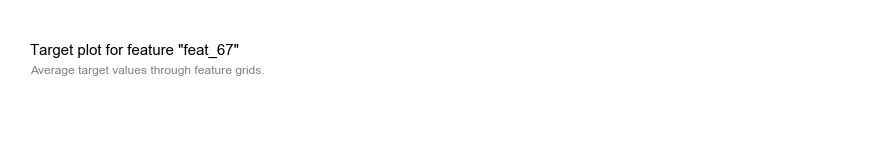

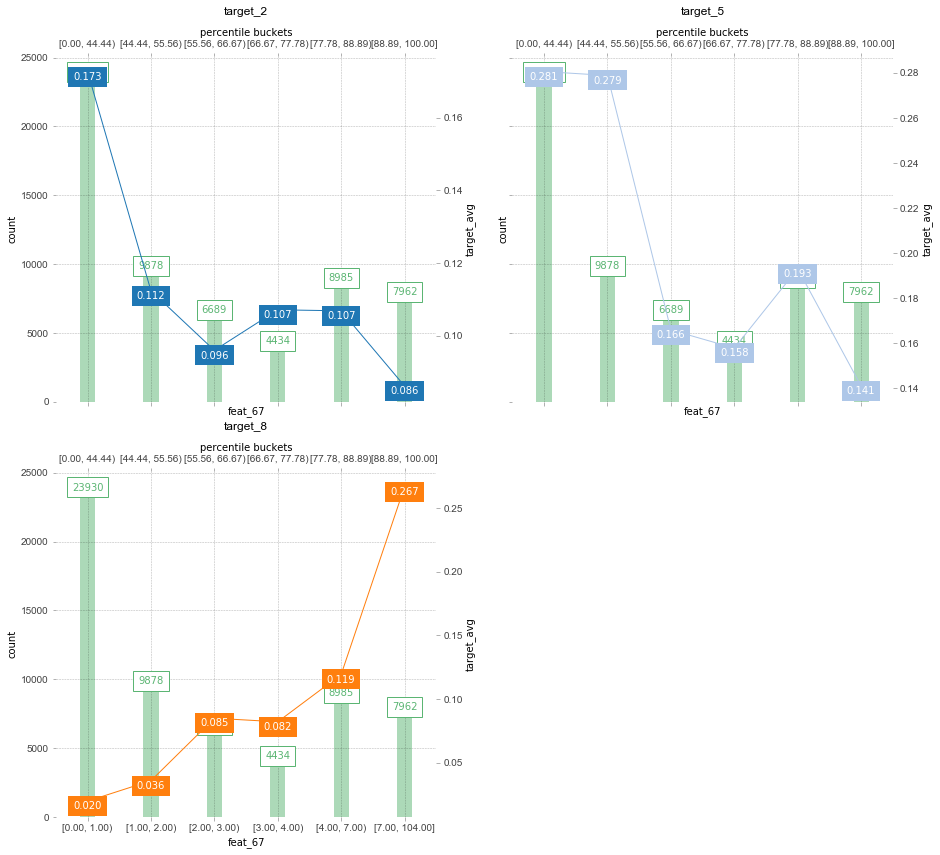

In [5]:
# subset of targets
axes, df = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                   target=['target_%d' %(i) for i in [2, 5, 8]], show_percentile=True, figsize=(15, 14))

In [6]:
df

,x,display_column,percentile_column,count,target_2,target_5,target_8
0,0,"[0.00, 1.00)","[0.00, 44.44)",23930,0.172628,0.280527,0.019766
1,1,"[1.00, 2.00)","[44.44, 55.56)",9878,0.112371,0.278801,0.035837
2,2,"[2.00, 3.00)","[55.56, 66.67)",6689,0.095978,0.165944,0.084916
3,3,"[3.00, 4.00)","[66.67, 77.78)",4434,0.107127,0.157871,0.082093
4,4,"[4.00, 7.00)","[77.78, 88.89)",8985,0.106845,0.193100,0.119310
5,5,"[7.00, 104.00]","[88.89, 100.00]",7962,0.086159,0.141045,0.266767


In [ ]:
axes = target_plot(df=otto_data, feature='feat_32', feature_name='feat_32', target=['target_2', 'target_3', 'target_4'], 
                   num_grid_points=20, show_percentile=True, figsize=(15, 8))

In [ ]:
# percentile_range
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 8), show_percentile=True)

In [ ]:
# equal grid_type
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=10, grid_type='equal', figsize=(15, 8))

In [ ]:
# grid_range
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=11, grid_type='equal', grid_range=(0, 10),  figsize=(15, 8))

In [ ]:
# customized grid points
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   cust_grid_points=range(0, 100, 10), figsize=(15, 8))

In [ ]:
# provide the Axes to plot on
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style('whitegrid')
ax1 = sns.distplot(otto_data['feat_67'].values, color='#5BB573', ax=axes[0])
ax1.set_title('feat_67 distribution\n')
ax1.set_xlabel('feat_67')
ax2 = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', ax=axes[1])

In [ ]:
# use plot params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Class rate through different feat_67 values',
    'subtitle': 'Average class rate through different feat_67 values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_color': '#3288bd',
    'bar_color': 'lightblue',
    'line_width': 1,
    'xticks_rotation': 90
}
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                   target=['target_2', 'target_5', 'target_8'], plot_params=plot_params, figsize=(15, 8))

# test target plot interact

In [ ]:
from pdpbox.info_plots import target_plot_interact

In [ ]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                            target=['target_0', 'target_1', 'target_2', 'target_3', 'target_4'], figsize=(15, 24))

In [ ]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                            target=['target_0', 'target_1', 'target_2', 'target_3', 'target_4'], figsize=(14, 24), show_percentile=True)

In [ ]:
2 % 2

In [ ]:
axes = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                            target=['target_0', 'target_2'], show_percentile=True, figsize=(14, 8))

In [ ]:
cax1.spines['bottom']

In [ ]:
def _plot_legend_colorbar(value_min, value_max, colorbar_ax, cmap, font_family):
    norm = mpl.colors.Normalize(vmin=float(value_min), vmax=float(value_max))

    # colorbar
    cax = inset_axes(colorbar_ax, height="100%", width="100%", loc=10)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=plt.get_cmap(cmap), norm=norm, orientation='horizontal')
    colorbar_ax.set_xlabel('Average target value', color='#424242')
    cb.outline.set_linewidth(0)
    cb.set_ticks([])

    colorbar_ax.set_xticks(range(2))
    colorbar_ax.set_xticklabels([round(value_min, 3), round(value_max, 3)])
    #_modify_legend_ax(colorbar_ax, font_family)

In [ ]:
import numpy
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib as mpl

data = numpy.random.random((20, 20))

test = ["ax1", "ax2", "ax3", "ax4", "ax5", "ax6", "ax7", "ax8", "ax9"]

fig = plt.figure(1, figsize=(16, 16))

for idx in range(len(test)):
    vars()[test[idx]] = fig.add_subplot(3, 3, (idx + 1))
    divider = make_axes_locatable(vars()[test[idx]])
    vars()["c" + test[idx]] = divider.append_axes("bottom", size = "5%", pad = 0.1)

norm = mpl.colors.Normalize(vmin=0.15, vmax=0.85)

im1 = ax1.imshow(data)
_plot_legend_colorbar(value_min=0.15, value_max=0.85, colorbar_ax=cax1, cmap='Blues', font_family='Arial')
# plt.colorbar(im1, cax = cax1)
#cb = mpl.colorbar.ColorbarBase(cax1, cmap=plt.get_cmap('Blues'), norm=norm, orientation='horizontal')
#cb.outline.set_linewidth(0)
#cax1.set_xlabel('cax1')
#cb.set_ticks([])
#cb.update_ticks()


im2 = ax2.imshow(data)
plt.colorbar(im2, cax = cax2)

im3 = ax3.imshow(data)
plt.colorbar(im3, cax = cax3)

im4 = ax4.imshow(data)
plt.colorbar(im4, cax = cax4)

im5 = ax5.imshow(data)
plt.colorbar(im5, cax = cax5)

im6 = ax6.imshow(data)
plt.colorbar(im6, cax = cax6)

im7 = ax7.imshow(data)
plt.colorbar(im7, cax = cax7)

im8 = ax8.imshow(data)
plt.colorbar(im8, cax = cax8)

im9 = ax9.imshow(data)
plt.colorbar(im9, cax = cax9)

plt.show()